In [2]:
# importing packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 
from sklearn import metrics

In [3]:
# open data and remove unnecesasry columns
df = pd.read_csv('/Users/SnehPandya/Desktop/DeepLearningAGN/data/tau_fulldata_matched.csv',index_col = 0)
df = df.rename(columns = {'z':'z_ground_truth'})
df = df.drop(columns = ['ID','RA','DEC','tau_lim_lo','tau_lim_hi','M_tau','ERR'])
df.head()

,tau,Mass_ground_truth,z_ground_truth
0,1.99550,7.523331,1.0730
1,2.27673,8.817950,0.7867
2,1.87484,8.921718,1.6199
3,2.47534,9.022211,0.6125
4,1.70714,9.249395,2.7563


In [6]:
# isolate attributes (redshift, tau) and targets (Mass)
X = df[['z_ground_truth','tau']].values # attributes
y = df[['Mass_ground_truth']].values # targets
print(X)
print(y)

[[ 1.073    1.9955 ]
 [ 0.7867   2.27673]
 [ 1.6199   1.87484]
 ..., 
 [ 1.801    2.72286]
 [ 0.987    2.09733]
 [ 1.409    2.99667]]
[[ 7.52333061]
 [ 8.81795034]
 [ 8.92171817]
 ..., 
 [ 8.45017379]
 [ 8.02155865]
 [ 8.98848251]]


In [7]:
# split into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [8]:
# applying regression 
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/base.py:503: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [8]:
# retrieve line of best fit attributes
print(regressor.intercept_) # y intercept (b)
print(regressor.coef_) # slope (m)
print(regressor.score(X_train,y_train)) #(r^2 score)

[ 8.0233596]
[[ 0.33273288  0.12811265]]
0.231149952883


In [13]:
y_pred_test = regressor.predict(X_test)
y_pred_train = regressor.predict(X_train)
print(y_pred_test)
print(y_pred_train)
print(X_test)

[[ 8.74803621]
 [ 8.81039895]
 [ 9.01661993]
 ..., 
 [ 8.38688693]
 [ 8.8330684 ]
 [ 9.00576388]]
[[ 8.75399526]
 [ 9.23987477]
 [ 8.67727584]
 ..., 
 [ 8.59103951]
 [ 8.4695744 ]
 [ 9.32565175]]
[[ 1.4669   1.84674]
 [ 1.3315   2.68518]
 [ 1.6465   3.47675]
 ..., 
 [ 0.395    1.81167]
 [ 1.5666   2.25153]
 [ 2.016    2.43235]]


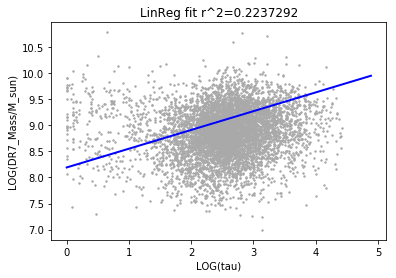

In [15]:
plt.scatter(X_train[:,1], y_train,  color='darkgray',s=2)
plt.plot([X_train.min(), X_train.max()], [y_pred_train.min(), y_pred_train.max()], color='blue', lw=2)
plt.xlabel('LOG(tau)')
plt.ylabel('LOG(DR7_Mass/M_sun)')
plt.title('LinReg fit r^2=' + str(regressor.score(X_test,y_test))[0:9])
plt.show()

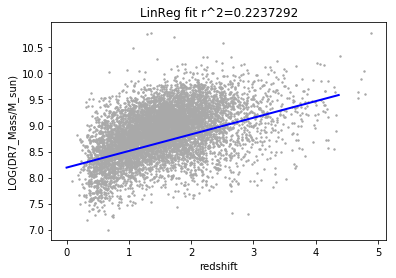

In [19]:
plt.scatter(X_train[:,0], y_train,  color='darkgray',s=2)
plt.scatter(X_test[:,0], y_test, color='darkgray',s=2)
plt.plot([X_test.min(), X_test.max()], [y_pred_test.min(), y_pred_test.max()], color='blue', lw=2)
plt.xlabel('redshift')
plt.ylabel('LOG(DR7_Mass/M_sun)')
plt.title('LinReg fit r^2=' + str(regressor.score(X_test,y_test))[0:9])
plt.show()

In [20]:
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)))

Root Mean Squared Error: 0.422282052482
